In [2]:
import keras
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
num_classes = 3
resnet_weights_path = '/content/drive/My Drive/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

In [5]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
import matplotlib.pyplot as plt
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import cv2
import numpy as np 
from tensorflow.python.framework import graph_util
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from sklearn.model_selection import train_test_split

In [0]:
data1='/content/drive/My Drive/fintest/1coal'
data2='/content/drive/My Drive/fintest/2coal'
data3='/content/drive/My Drive/fintest/3coal'

In [0]:
def data_with_label():
    images=[]
    cnt = 0
    for i in tqdm(os.listdir(data1)):
        path=os.path.join(data1,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        #img = tf.image.grayscale_to_rgb( img, name=None)
        img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        img=cv2.resize(img,(224,224))
        images.append([np.array(img),np.array([1,0,0])])
    cnt = 0
    for i in tqdm(os.listdir(data2)):
        path=os.path.join(data2,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        #img = tf.image.grayscale_to_rgb( img, name=None)
        img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        img=cv2.resize(img,(224,224))
        images.append([np.array(img),np.array([0,1,0])])
    cnt = 0
    for i in tqdm(os.listdir(data2)):
        path=os.path.join(data3,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        #img = tf.image.grayscale_to_rgb( img, name=None)
        img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        img=cv2.resize(img,(224,224))
        images.append([np.array(img),np.array([0,0,1])])
        
    shuffle(images)
    return images

In [9]:
data = data_with_label()

100%|██████████| 299/299 [03:38<00:00,  2.32it/s]


In [0]:
train_data, test_data = train_test_split(data, test_size=0.2)

In [0]:
from keras.applications.resnet50 import preprocess_input
tr_img_data = np.array([i[0] for i in train_data]).reshape(-1,224,224,3)
tr_img_data = preprocess_input(tr_img_data)
tr_lbl_data = np.array([i[1] for i in train_data])
tst_img_data = np.array([i[0] for i in test_data]).reshape(-1,224,224,3)
tst_img_data = preprocess_input(tst_img_data)
tst_lbl_data = np.array([i[1] for i in test_data])

In [19]:

history = my_new_model.fit(x=tr_img_data,y=tr_lbl_data,epochs=25,batch_size=64,validation_data=(tst_img_data, tst_lbl_data))
my_new_model.summary()

Train on 790 samples, validate on 198 samples
Epoch 1/25
790/790 [==============================] - 4s 5ms/step - loss: 0.1971 - acc: 0.9684 - val_loss: 0.3310 - val_acc: 0.8939
Epoch 2/25
790/790 [==============================] - 4s 5ms/step - loss: 0.1916 - acc: 0.9684 - val_loss: 0.3286 - val_acc: 0.9040
Epoch 3/25
790/790 [==============================] - 4s 5ms/step - loss: 0.1916 - acc: 0.9671 - val_loss: 0.3911 - val_acc: 0.8434
Epoch 4/25
790/790 [==============================] - 4s 5ms/step - loss: 0.1745 - acc: 0.9848 - val_loss: 0.3498 - val_acc: 0.8737
Epoch 5/25
790/790 [==============================] - 4s 5ms/step - loss: 0.1802 - acc: 0.9709 - val_loss: 0.4442 - val_acc: 0.8030
Epoch 6/25
790/790 [==============================] - 4s 5ms/step - loss: 0.1673 - acc: 0.9747 - val_loss: 0.3926 - val_acc: 0.8434
Epoch 7/25
790/790 [==============================] - 4s 5ms/step - loss: 0.1641 - acc: 0.9772 - val_loss: 0.3741 - val_acc: 0.8687
Epoch 8/25
790/790 [==========

In [21]:
scores = my_new_model.evaluate(tst_img_data, tst_lbl_data,batch_size=64, verbose=0)
print("%s: %.2f%%" % (my_new_model.metrics_names[1], scores[1]*100))
 


acc: 86.87%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


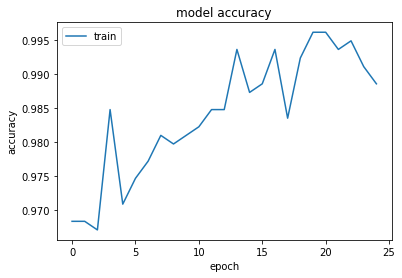

In [22]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


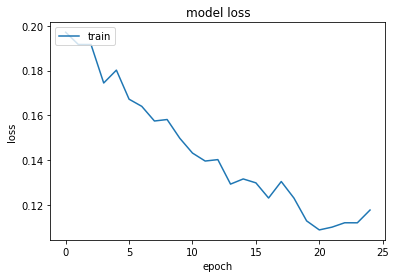

In [23]:
 # summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Save Keras Model or weights on google drive

# create on Colab directory
my_new_model.save('baamodel.h5')    
model_file = drive.CreateFile({'title' : 'baamodel.h5'})
model_file.SetContentFile('baamodel.h5')
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})


GoogleDriveFile({'id': '1sDCNk9a087-Mib_VHbwimRiyr2guZd4w'})

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


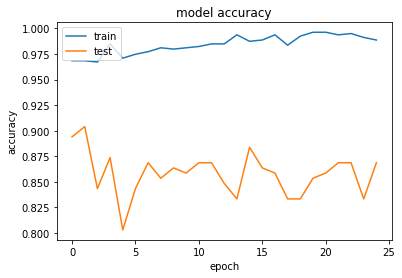

In [24]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
